Ryan Solanki, Jake Merrill, Krishaan Patel, Vishal Gondi, Ryo Kanda

**CS105 Final Project Report**

The dataset we have is a Spotify dataset that includes over 18,000 songs. The dataset includes the song’s name, artist, lyrics, genre, and various audio features. With this dataset we wanted to be able to predict the genre of a specific song using a predictive model. To do this we focused on using the different audio features of the songs, such as danceability, energy, and loudness. These features are measured on a scale quantitatively by Spotify’s own process. The predictive model we decided to use to incorporate these different features was a KNN Classifier model.


In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


df = pd.read_csv("spotify_songs.csv")

**Original Dataset (Before Cleaning)**

In [2]:
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


**Cleaning Up the Dataset** <br>
We first remove all unnecessary features from the dataset, because we only wish to observe quantitative song attributes. <br>
Initially all genres were included, but after analyzing our dataset we found dropping certain genres would improve our accuracy. <br>

The final combination of genres we used were EDM, Rap, and Rock as shown below. <br>

We assign numeric values to each categorical genre to be later used for our knn model.

In [3]:
df2 = df.copy()
df2.drop(['lyrics', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'track_id', 'track_artist', 'playlist_subgenre'], axis=1, inplace=True)
#df2.drop(df.index[df['playlist_genre'] == 'edm'], inplace = True)
df2.drop(df.index[df['playlist_genre'] == 'pop'], inplace = True)
#df2.drop(df.index[df['playlist_genre'] == 'rap'], inplace = True)
#df2.drop(df.index[df['playlist_genre'] == 'rock'], inplace = True)
df2.drop(df.index[df['playlist_genre'] == 'r&b'], inplace = True)
df2.drop(df.index[df['playlist_genre'] == 'latin'], inplace = True)

newGenre = {'playlist_genre':{'edm':0,'pop':1,'rap':2,'rock':3,'r&b':4,'latin':5}}
df2 = df2.replace(newGenre)

We normalized the data using the MinMaxScaler method.

In [4]:
temp = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'valence', 'tempo', 'duration_ms']

tempG = temp.copy()
tempG.append('playlist_genre')
preNormalizedData = df2[tempG]
x_data = preNormalizedData.drop(['playlist_genre'],axis=1)
y_data = preNormalizedData['playlist_genre']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
normalizedData = pd.DataFrame(X_data_minmax,columns=temp)
normalizedData = normalizedData.set_index(y_data.index)

**EDA**

In [5]:
EDA_df = df.copy()
EDA_df.drop(['lyrics', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'track_id', 'track_artist', 'playlist_subgenre'], axis=1, inplace=True)
newGenre_EDA = {'playlist_genre':{'edm':0,'pop':1,'rap':2,'rock':3,'r&b':4,'latin':5}}
EDA_df = EDA_df.replace(newGenre_EDA)
preNormalizedData_EDA = EDA_df[['track_popularity', 'danceability', 'speechiness','tempo', 'energy', 'instrumentalness', 'loudness', 'duration_ms','playlist_genre', 'valence', 'acousticness']]
x_data_EDA = preNormalizedData_EDA.drop(['playlist_genre'],axis=1)
y_data_EDA = preNormalizedData_EDA['playlist_genre']

X_data_minmax_EDA = MinMaxScaler.fit_transform(x_data_EDA)
normalizedData_EDA = pd.DataFrame(X_data_minmax_EDA,columns=['track_popularity', 'danceability', 'instrumentalness', 'speechiness','tempo', 'energy', 'loudness', 'duration_ms', 'valence', 'acousticness'])
normalizedData_EDA = normalizedData_EDA.set_index(y_data_EDA.index)
fullNormalizedData_EDA = normalizedData_EDA.copy()
fullNormalizedData_EDA['playlist_genre'] = preNormalizedData_EDA['playlist_genre']

Histogram Visualizations for the Normalized Ratings of Each Feature

array([[<AxesSubplot:title={'center':'track_popularity'}>]], dtype=object)

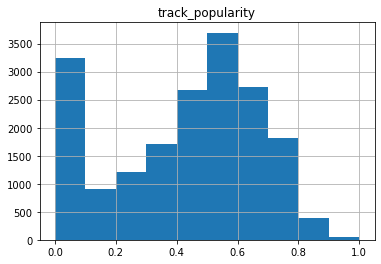

In [6]:
normalizedData_EDA.hist(column='track_popularity')

array([[<AxesSubplot:title={'center':'danceability'}>]], dtype=object)

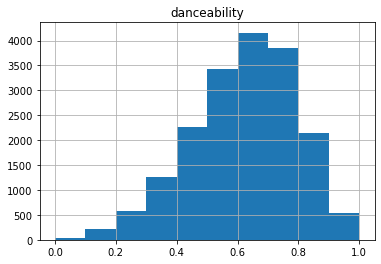

In [7]:
normalizedData_EDA.hist(column='danceability')

array([[<AxesSubplot:title={'center':'instrumentalness'}>]], dtype=object)

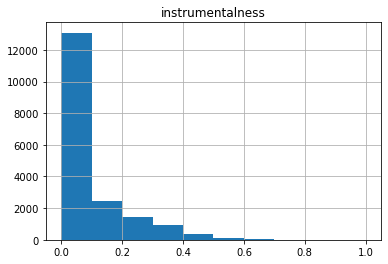

In [8]:
normalizedData_EDA.hist(column='instrumentalness')

array([[<AxesSubplot:title={'center':'speechiness'}>]], dtype=object)

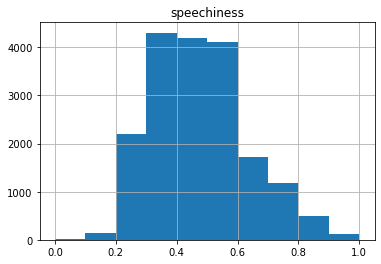

In [9]:
normalizedData_EDA.hist(column='speechiness')

array([[<AxesSubplot:title={'center':'tempo'}>]], dtype=object)

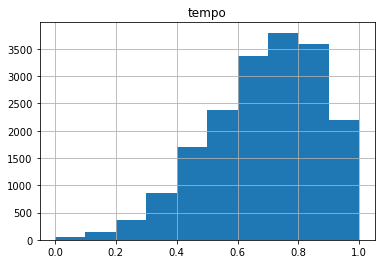

In [10]:
normalizedData_EDA.hist(column='tempo')

array([[<AxesSubplot:title={'center':'energy'}>]], dtype=object)

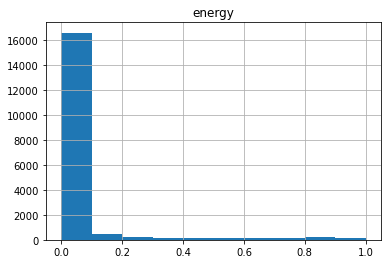

In [11]:
normalizedData_EDA.hist(column='energy')

array([[<AxesSubplot:title={'center':'loudness'}>]], dtype=object)

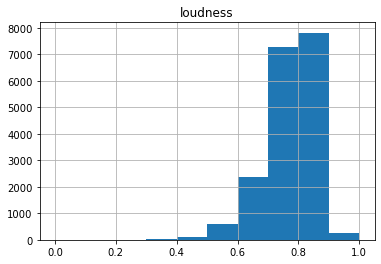

In [12]:
normalizedData_EDA.hist(column='loudness')

array([[<AxesSubplot:title={'center':'duration_ms'}>]], dtype=object)

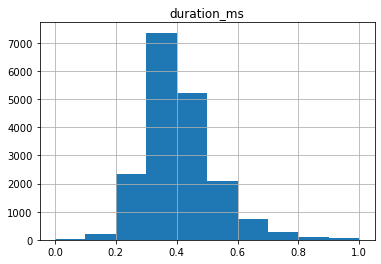

In [13]:
normalizedData_EDA.hist(column='duration_ms')

array([[<AxesSubplot:title={'center':'valence'}>]], dtype=object)

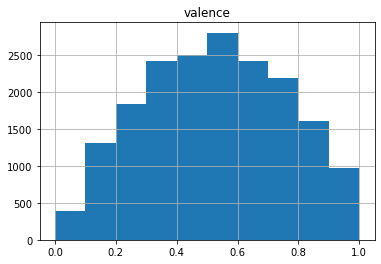

In [14]:
normalizedData_EDA.hist(column='valence')

array([[<AxesSubplot:title={'center':'acousticness'}>]], dtype=object)

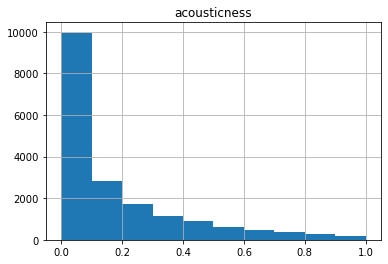

In [15]:
normalizedData_EDA.hist(column='acousticness')

Here, we noticed some features were not very evenly distributed and some were. <br>
From this, we gathered that non-evenly distributed features might not show much difference between genres. <br>
In order to truly see this, we created bar graphs to visualize the mean ratings of each feature between the different genres. <br>

Bar Graph Visualizations for the Mean Normalized Ratings of Each Feature Between Different Genres

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

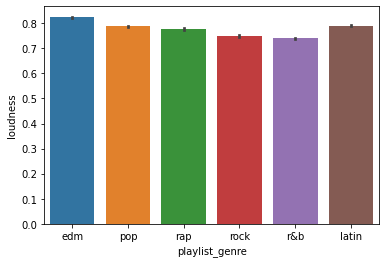

In [16]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='loudness').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

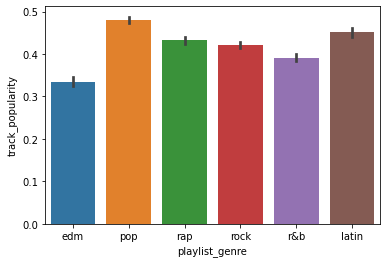

In [17]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='track_popularity').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

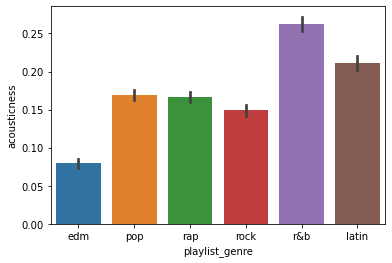

In [18]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='acousticness').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

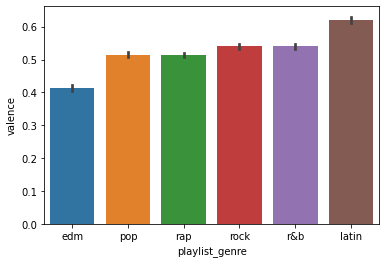

In [19]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='valence').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

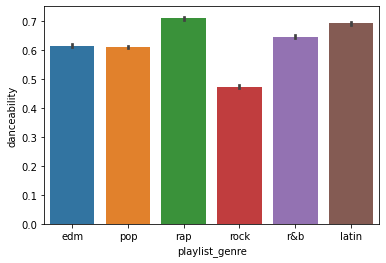

In [20]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='danceability').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

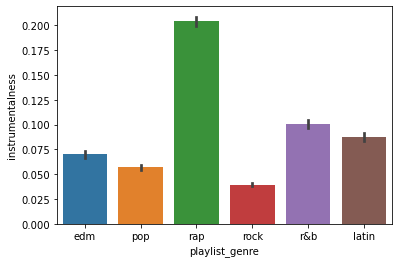

In [21]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='instrumentalness').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

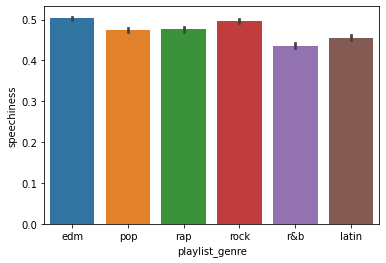

In [22]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='speechiness').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

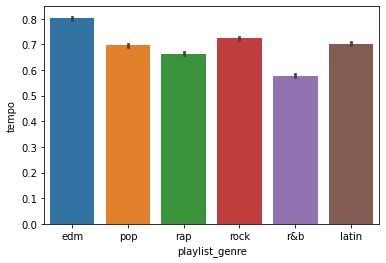

In [23]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='tempo').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

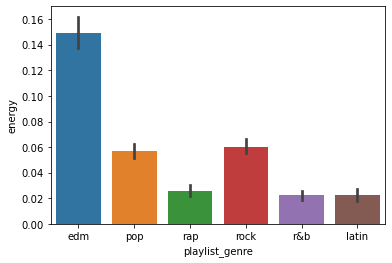

In [24]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='energy').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

[Text(0, 0, 'edm'),
 Text(1, 0, 'pop'),
 Text(2, 0, 'rap'),
 Text(3, 0, 'rock'),
 Text(4, 0, 'r&b'),
 Text(5, 0, 'latin')]

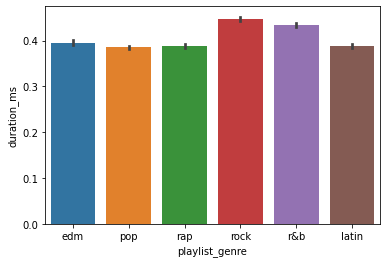

In [25]:
sns.barplot(data=fullNormalizedData_EDA, x='playlist_genre', y='duration_ms').set_xticklabels(['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'])

First, we tried running a KNN model including every genre and every quantiative feature. <br>
<br>
To be able to create a KNN model, we imported a KNN classifier from the sklearn library. <br> 
In order to intialize the model, we split the data into training and testing. <br>
From there, we fit the model with the training data. <br>
Finally, we predicted the genres based on the features in the testing data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(normalizedData_EDA, y_data_EDA,test_size=0.2, random_state = 1)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

We import sklearn metrics to observe the accuracy of our model which was about .47

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[252  93  20  19  19   6]
 [119 372  63 107  84  39]
 [ 57 113 368  32  81  42]
 [ 50 163  13 391  63  14]
 [ 35 136 116  94 236  57]
 [ 47 114  67  33  58 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.62      0.52       409
           1       0.38      0.47      0.42       784
           2       0.57      0.53      0.55       693
           3       0.58      0.56      0.57       694
           4       0.44      0.35      0.39       674
           5       0.43      0.27      0.33       437

    accuracy                           0.47      3691
   macro avg       0.47      0.47      0.46      3691
weighted avg       0.48      0.47      0.47      3691

Accuracy: 0.4706041723110268


In order to try improving this low accuracy of our model, we decided to try removing latin and r&b due to the similarities in the mean ratings of their features based on the bar graphs above. <br>
With the new model, predicting only edm, pop, rap, and rock, we were able to produce an accuracy of .63

In [28]:
EDA_df.drop(df.index[df['playlist_genre'] == 'latin'], inplace = True)
EDA_df.drop(df.index[df['playlist_genre'] == 'r&b'], inplace = True)
newGenre_EDA = {'playlist_genre':{'edm':0,'pop':1,'rap':2,'rock':3}}
EDA_df = EDA_df.replace(newGenre_EDA)
preNormalizedData_EDA = EDA_df[['track_popularity', 'danceability', 'speechiness','tempo', 'energy', 'instrumentalness', 'loudness', 'duration_ms','playlist_genre', 'valence', 'acousticness']]
x_data_EDA = preNormalizedData_EDA.drop(['playlist_genre'],axis=1)
y_data_EDA = preNormalizedData_EDA['playlist_genre']

X_data_minmax_EDA = MinMaxScaler.fit_transform(x_data_EDA)
normalizedData_EDA = pd.DataFrame(X_data_minmax_EDA,columns=['track_popularity', 'danceability', 'instrumentalness', 'speechiness','tempo', 'energy', 'loudness', 'duration_ms', 'valence', 'acousticness'])
normalizedData_EDA = normalizedData_EDA.set_index(y_data_EDA.index)
fullNormalizedData_EDA = normalizedData_EDA.copy()
fullNormalizedData_EDA['playlist_genre'] = preNormalizedData_EDA['playlist_genre']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(normalizedData_EDA, y_data_EDA,test_size=0.2, random_state = 1)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[261 114  23  24]
 [120 479  72 100]
 [ 51 164 434  36]
 [ 42 190  20 460]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       422
           1       0.51      0.62      0.56       771
           2       0.79      0.63      0.70       685
           3       0.74      0.65      0.69       712

    accuracy                           0.63      2590
   macro avg       0.65      0.63      0.63      2590
weighted avg       0.65      0.63      0.64      2590

Accuracy: 0.6308880308880309


Next, we tried looping through every combination with at least 5 features and 3 genres to try finding the best accuracy.

In [31]:
import time

Import libraries and define the powerset function.

In [33]:
from itertools import chain, combinations
from concurrent import futures
import datetime
def powerset(iterable, min, max):
    "powerset([1,2,3]) -->() (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(min, max))

In [44]:
temp_features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
feat_comb = list(powerset(temp_features, 5, len(temp_features)+1))

In [35]:
genres = ['edm', 'pop', 'rap', 'rock', 'r&b', 'latin'] #genres being removed
rem_genre_comb = list(powerset(genres, 0, 4))

We loop through each possible combination, testing the accuracy of its KNN model to then determine the best overall accuracy.

In [36]:
df3 = df.copy()
df3.drop(['lyrics', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'track_id', 'track_artist', 'playlist_subgenre'], axis=1, inplace=True)

#2d array of accuracies
accuracy_df = pd.DataFrame(columns = rem_genre_comb)

# insert column of accuracy into df for given drop_genre
def knn_column(drop_genre, df):
    start_time = time.time()
    
    # temporary column to add to df
    loop_column = []
    
    # copy df, drop genres for given drop_genre
    loopdf = df3.copy()
    for drop_g in drop_genre:
        loopdf.drop(loopdf.index[loopdf['playlist_genre'] == drop_g], inplace=True)
    loopdf = loopdf.replace(newGenre)
    
    # loop through every 7099 combinations of features
    for f in feat_comb:
        temp_feat = list(f)
        temp_feat_g = temp_feat.copy()
        temp_feat_g.append('playlist_genre')
        loop_preN = loopdf[temp_feat_g]
        temp_x = loop_preN.drop(['playlist_genre'], axis=1)
        temp_y = loop_preN['playlist_genre']
        
        minmax = preprocessing.MinMaxScaler()
        temp_x_minmax = minmax.fit_transform(temp_x)
        loop_N = pd.DataFrame(temp_x_minmax, columns=temp_feat)
        loop_N = loop_N.set_index(temp_y.index)
        
        loop_X_train, loop_X_test, loop_y_train, loop_y_test = train_test_split(loop_N, temp_y, test_size=0.2, random_state=1)
        loop_knn = KNeighborsClassifier(n_neighbors=31, weights='distance', p=1)
        loop_knn.fit(loop_X_train, loop_y_train)
        loop_ypred = loop_knn.predict(loop_X_test)
        
        # insert accuracy into temporery column
        loop_column.append(accuracy_score(loop_y_test, loop_ypred))
    print(drop_genre)
    print("%s s" % (time.time() - start_time))
    # insert results into 2d array of accuracies
    df[drop_genre] = loop_column

print("Starting")
print(datetime.datetime.now())

# process list
future_list = []
# run with 8 processes
with futures.ThreadPoolExecutor(max_workers=8) as executor:
    # loop through every 42 conbinations of dropped genres
    for i in rem_genre_comb:
        # assign each process knn_column function with genres i to drop and accuracy_df to write the result
        future = executor.submit(knn_column, i, accuracy_df)
        future_list.append(future)
    _ = futures.as_completed(fs=future_list)

print("Finishing")
print(datetime.datetime.now())    

Starting
2022-06-04 17:04:02.755293
('edm', 'pop')
29.84822416305542 s
('pop',)
34.56515336036682 s
('rock',)
34.75464582443237 s
('r&b',)
36.69663619995117 s
('rap',)
37.03425693511963 s
('latin',)
39.38464021682739 s
('edm',)
40.0018424987793 s
()
44.6952109336853 s
('edm', 'rap')
27.047967672348022 s
('pop', 'rap')
23.26003861427307 s
('edm', 'rock')
26.79314875602722 s
('pop', 'rock')
22.666531324386597 s
('edm', 'r&b')
28.038539171218872 s
('pop', 'r&b')
24.54838252067566 s
('edm', 'latin')
30.8897807598114 s
('pop', 'latin')
27.18241810798645 s
('rap', 'rock')
24.864214420318604 s
('rap', 'r&b')
26.859485387802124 s
('edm', 'pop', 'rap')
21.803558826446533 s
('rock', 'r&b')
29.4537296295166 s
('rap', 'latin')
31.508143424987793 s
('rock', 'latin')
31.113771200180054 s
('edm', 'pop', 'rock')
22.812278032302856 s
('r&b', 'latin')
32.60349225997925 s
('edm', 'pop', 'r&b')
23.59246015548706 s
('edm', 'pop', 'latin')
23.262115001678467 s
('edm', 'rap', 'rock')
21.64817190170288 s
('ed

Output the accuracy dataframe to find the most accuracte combination.

In [42]:
accuracy_df['Combination'] = feat_comb
accuracy_df.set_index('Combination', inplace=True)
display(accuracy_df)
#accuracy_df.to_csv("accuracy1.csv")

,(),"(edm,)","(pop,)","(rap,)","(rock,)","(r&b,)","(latin,)","(edm, pop)","(edm, rap)","(edm, rock)",...,"(pop, rap, rock)","(pop, rap, r&b)","(pop, rap, latin)","(pop, rock, r&b)","(pop, rock, latin)","(pop, r&b, latin)","(rap, rock, r&b)","(rap, rock, latin)","(rap, r&b, latin)","(rock, r&b, latin)"
Combination,,,,,,,,,,,,,,,,,,,,,
"(danceability, energy, loudness, mode, speechiness)",0.465186,0.504875,0.551676,0.477265,0.465015,0.514871,0.503993,0.602657,0.553379,0.528704,...,0.622517,0.701097,0.728499,0.634931,0.671420,0.773438,0.561436,0.572344,0.622385,0.639449
"(danceability, energy, loudness, mode, valence)",0.436196,0.460085,0.526443,0.464985,0.427184,0.480502,0.464373,0.551127,0.523425,0.474011,...,0.648344,0.713363,0.720067,0.606697,0.636623,0.730469,0.576642,0.581420,0.643828,0.587487
"(danceability, energy, loudness, mode, tempo)",0.456245,0.480804,0.568268,0.507136,0.477402,0.510575,0.507985,0.581320,0.573349,0.521334,...,0.675497,0.752098,0.740304,0.655942,0.689104,0.748326,0.618613,0.620395,0.649059,0.629905
"(danceability, energy, loudness, mode, duration_ms)",0.435654,0.458867,0.508469,0.460339,0.424841,0.472902,0.475737,0.564412,0.533794,0.485648,...,0.625828,0.710136,0.698707,0.578464,0.616087,0.725446,0.553528,0.565403,0.632845,0.584836
"(danceability, energy, loudness, speechiness, valence)",0.483880,0.521024,0.579675,0.481912,0.485437,0.544944,0.520885,0.609098,0.563364,0.527153,...,0.658940,0.734022,0.748735,0.671701,0.703936,0.794085,0.588200,0.601175,0.652720,0.665960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(danceability, energy, loudness, speechiness, valence, tempo, duration_ms)",0.538336,0.562767,0.627376,0.534683,0.551055,0.592862,0.571560,0.649356,0.594086,0.571761,...,0.701987,0.799225,0.784711,0.715036,0.738163,0.825893,0.627129,0.663641,0.679393,0.702545
"(danceability, energy, mode, speechiness, valence, tempo, duration_ms)",0.521810,0.546313,0.610439,0.530368,0.541346,0.583609,0.562346,0.638889,0.584485,0.567494,...,0.690728,0.780504,0.769533,0.714380,0.731318,0.821987,0.622871,0.648692,0.656904,0.691410
"(danceability, loudness, mode, speechiness, valence, tempo, duration_ms)",0.511785,0.539610,0.600069,0.505808,0.517576,0.582948,0.542690,0.620370,0.567204,0.550039,...,0.676821,0.779858,0.745363,0.705844,0.697661,0.806362,0.628345,0.633743,0.655335,0.696182


In [10]:
X_train, X_test, y_train, y_test = train_test_split(normalizedData, y_data,test_size=0.2, random_state = 1)
#knn_clf = KNeighborsClassifier(n_neighbors=35, weights='distance') #0.6656370656370656
knn_clf = KNeighborsClassifier(n_neighbors=8, weights='distance', p=1)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[293  65  65]
 [ 71 537  55]
 [ 50  21 635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       423
           2       0.86      0.81      0.84       663
           3       0.84      0.90      0.87       706

    accuracy                           0.82      1792
   macro avg       0.80      0.80      0.80      1792
weighted avg       0.82      0.82      0.82      1792

Accuracy: 0.8175223214285714


**Here, we have found the highest accuracy of .8175** <br>
It predicts the genres of edm, rap, and rock. <br>
The features the KNN model is based on are 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'valence', 'tempo', and 'duration_ms'. <br>

<br>

Contributions: We all contributed equally throughout each part of the project, held meetings regularly where we all discussed parts that we are working on within a group call.